In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [4]:
df = pd.read_csv(DATA_URL + "telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.shape

(3333, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
df["Churn"] = df["Churn"].astype("int64")

In [8]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [9]:
df.describe(include=["object"])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [10]:
df["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [11]:
df["Churn"].value_counts(normalize=True)*100

Churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64

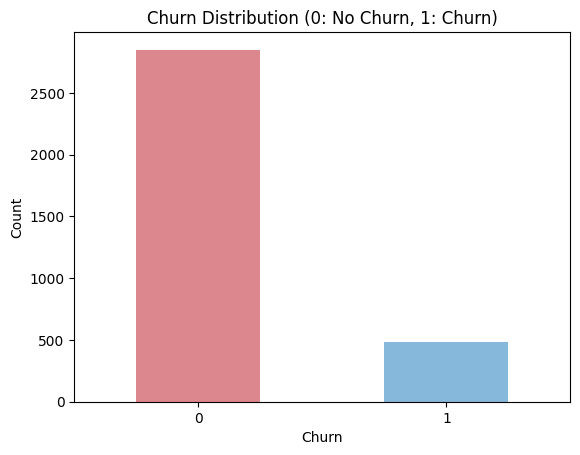

In [12]:
df["Churn"].value_counts().plot.bar(rot=0, color=["#dc868d", "#86b8dc"])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution (0: No Churn, 1: Churn)')
plt.show()

In [13]:
df.loc[0:5, "State":"Area code"]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [14]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [15]:
df[df["International plan"].apply(lambda plan: plan == "Yes")].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [16]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [17]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["State"])[columns_to_show].agg(["mean", "std", "min", "max"])

Total day minutes                         Total eve minutes             \
                   mean        std   min    max              mean        std   
State                                                                          
AK           178.384615  49.640430  58.2  278.4        184.282692  49.160213   
AL           186.010000  51.466249  68.7  308.0        195.462500  50.909648   
AR           176.116364  50.368831  55.3  273.4        201.047273  50.957484   
AZ           171.604688  51.941907  58.9  281.1        187.748437  49.070513   
CA           183.564706  47.742484  92.8  280.0        198.970588  40.361770   
CO           178.712121  59.805856  30.9  350.8        206.884848  53.306802   
CT           175.140541  60.523424  37.8  321.6        203.828378  55.971033   
DC           171.379630  57.157338  51.5  306.2        196.272222  47.422479   
DE           174.583607  52.060645  46.5  334.3        208.247541  46.393479   
FL           179.533333  57.468499  47.7  288.1        210.276190  54.921782   
GA           185.025926  53.736275  71.2  299.5        204.140741  47.011053   
HI           175.962264  54.834311  41.9  291.6        191.343396  50.612090   
IA           177.613636  48.400925  88.1  308.6        206.400000  55.424480   
ID           178.619178  52.794622  55.6  274.4        194.610959  44.761049   
IL           173.591379  49.802932  69.1  269.6        196.798276  52.539016   
IN           196.525352  51.956157  49.9  300.4        202.559155  55.354715   
KS           191.555714  58.143148  27.0  321.3        202.512857  48.809158   
KY           173.754237  54.943583  73.8  314.6        196.244068  50.654953   
LA           178.376471  45.435139  58.4  310.4        197.819608  57.194972   
MA           180.103077  51.288790  58.9  293.7        214.664615  52.439425   
MD           197.228571  58.031576  78.1  321.1        196.061429  50.489311   
ME           185.262903  52.707427  58.8  322.3        200.514516  44.995424   
MI           180.593151  54.873206  18.9  314.1        208.172603  51.870258   
MN           183.354762  56.625260  50.6  317.8        199.334524  46.627874   
MO           170.506349  58.076573  45.0  335.5        200.141270  57.256014   
MS           177.929231  61.631895  70.7  313.2        200.009231  50.163423   
MT           174.007353  48.848851  89.8  273.2        201.526471  52.860757   
NC           185.145588  56.222470  54.7  322.3        202.536765  47.720895   
ND           187.338710  45.251481  82.5  295.3        207.775806  45.635307   
NE           177.465574  52.599645  34.0  272.7        203.111475  54.304328   
NH           177.328571  59.963106  17.6  322.4        198.158929  51.762225   
NJ           196.225000  48.608661  40.9  301.5        198.289706  53.385299   
NM           171.429032  44.931695  69.1  286.7        212.193548  46.616795   
NV           176.425758  56.561785  67.4  303.9        202.915152  50.859687   
NY           175.114458  56.786981  60.6  346.8        196.993976  58.252500   
OH           183.274359  55.755483   7.8  345.3        206.441026  49.864079   
OK           179.909836  61.730340   2.6  329.8        193.018033  57.107987   
OR           176.246154  56.013219  12.5  324.7        201.496154  47.566428   
PA           188.375556  55.137556  35.1  288.7        191.653333  45.323271   
RI           167.478462  55.418410  40.4  286.2        211.038462  49.939531   
SC           166.441667  63.585043  19.5  322.5        207.456667  49.462711   
SD           189.690000  55.366666   0.0  328.1        202.723333  45.108319   
TN           175.771698  50.608282  54.8  305.2        210.513208  45.766754   
TX           181.516667  57.146528  59.5  326.5        199.787500  51.865041   
UT           183.569444  53.796365  63.2  285.7        195.343056  51.600630   
VA           177.244156  49.273203  44.9  283.4        204.216883  44.592478   
VT           182.031507  52.048788   0.0  307.1        205.368493  48.275120   
WA    

In [18]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [19]:
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

Voice mail plan,No,Yes
Churn,,
0,0.602460,0.252625
1,0.120912,0.024002


In [20]:
df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc=["mean", "std"],
)

mean                                               std  \
          Total day calls Total eve calls Total night calls Total day calls   
Area code                                                                     
408            100.496420       99.788783         99.039379       19.694243   
415            100.576435      100.503927        100.398187       20.251354   
510            100.097619       99.671429        100.601190       20.098565   

                                             
          Total eve calls Total night calls  
Area code                                    
408             19.433974         19.407893  
415             20.090270         19.428139  
510             20.080271         19.983527

In [21]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


In [22]:
df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


In [23]:
# get rid of just created columns
df.drop(["Total charge", "Total calls"], axis=1, inplace=True)
# and here’s how you can delete rows
df.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


# First attempt at predicting telecom churn

In [24]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [25]:
# import some nice vis settings
sns.set()
# Graphics in the Retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

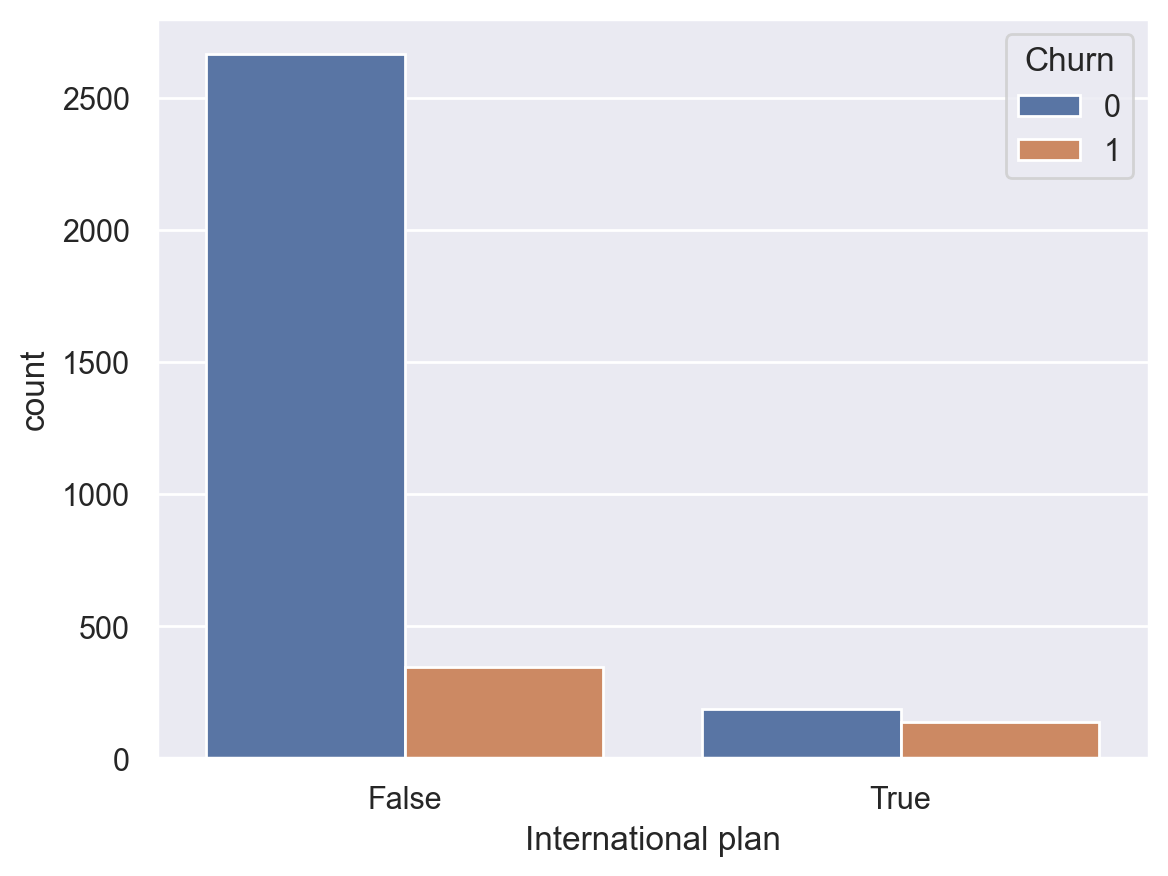

In [26]:
sns.countplot(x="International plan", hue="Churn", data=df);

In [27]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


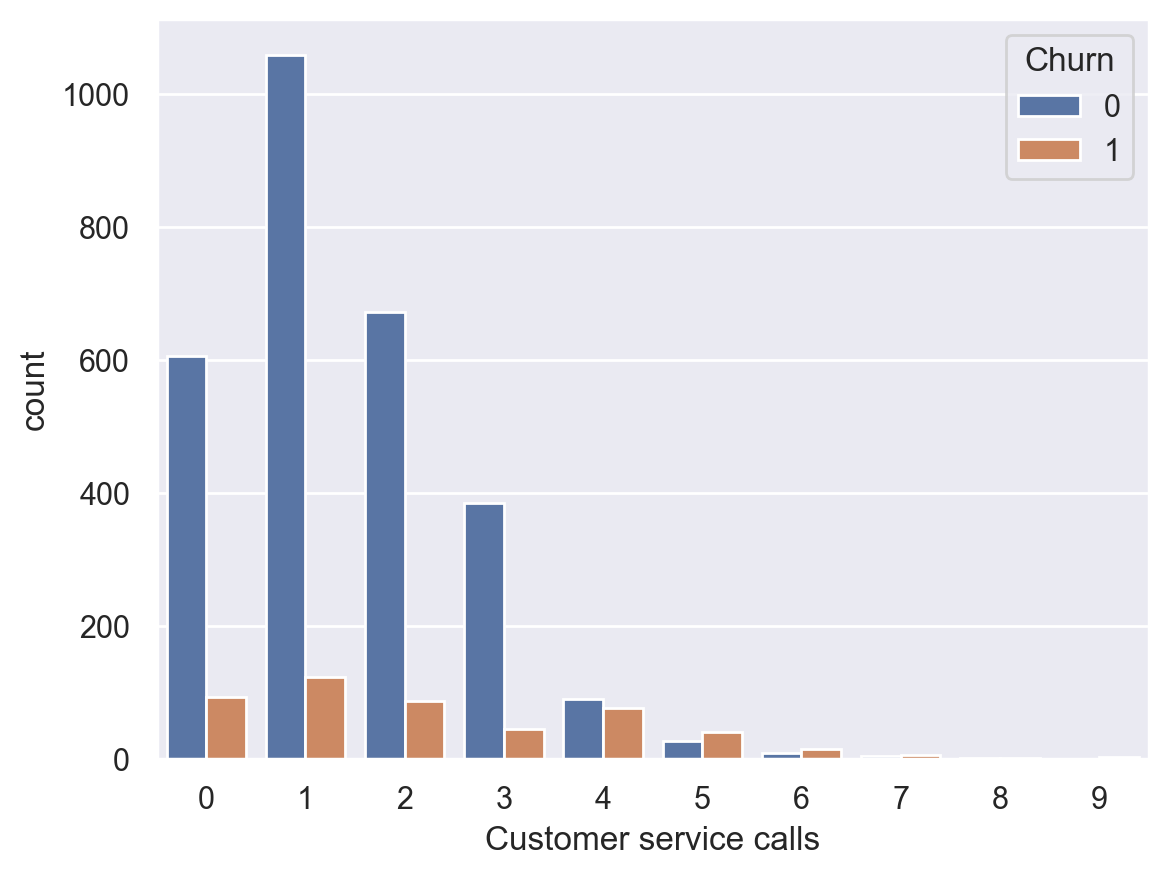

In [28]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

In [29]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


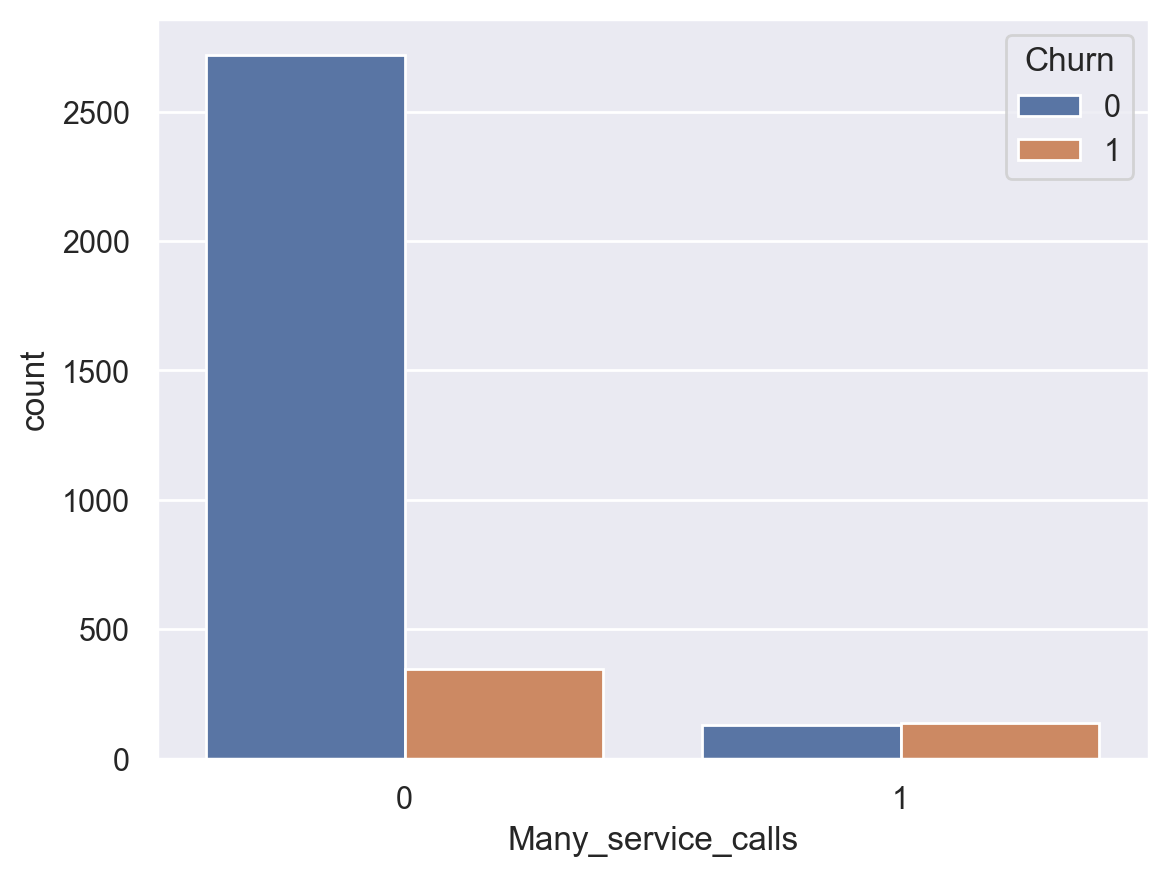

In [30]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df);

In [31]:
pd.crosstab(df["Many_service_calls"] & df["International plan"], df["Churn"], margins=True)

Churn,0,1,All
row_0,,,
False,2841,464,3305
True,9,19,28
All,2850,483,3333
